In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn import metrics
from sklearn import tree

In [ ]:
dataset, gnb_acc, tree_acc =[], [], []

# Iris Dataset

### Pre-processing

In [ ]:
dataset.append('Iris')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Iris.csv')

FileNotFoundError: ignored

In [ ]:
df.head(10)

NameError: ignored

In [ ]:
df.size

NameError: ignored

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
for i in df.columns:
  print(i)

In [ ]:
df.drop(columns = 'Id', inplace = True)

In [ ]:
df.replace(to_replace = 'Iris-setosa', value = 0, inplace = True)
df.replace(to_replace =  'Iris-versicolor', value = 1, inplace = True)
df.replace(to_replace = 'Iris-virginica', value = 2, inplace = True)

In [ ]:
df.head()

In [ ]:
df.tail()

NameError: ignored

In [ ]:
X = pd.DataFrame(df, columns = ['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm'])
X.head()

NameError: ignored

In [ ]:
y = df['Species'].to_numpy()
y

NameError: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1002)

NameError: ignored

### Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
acc = accuracy_score(y_pred, y_test)
gnb_acc.append(acc)
print(f'Accuracy using Gaussian Naive Bayes: {acc}')

In [ ]:
matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

cm_display.plot()
plt.show()

### Decision Tree

In [ ]:
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)
 
predicted_value = model.predict(X_test)
acc = accuracy_score(predicted_value, y_test)
tree_acc.append(acc)
print(f'Accuracy using Decision Tree: {acc}')

In [ ]:
tree_matrix = metrics.confusion_matrix(y_test, y_pred)
tree_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = tree_matrix, display_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

tree_cm_display.plot()
plt.show()

### K-Fold Cross Validation

In [ ]:
final_acc = 0
k_folds = KFold(n_splits = 10, shuffle = True, random_state = 2002)
for train_index, test_index in k_folds.split(X):
  X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
  y_train, y_test = y[train_index], y[test_index]
  rfc_model = GaussianNB()
  rfc_model.fit(X_train, y_train)
  test_preds = rfc_model.predict(X_test)
  test_accuracy = accuracy_score(y_test, test_preds)
  final_acc += test_accuracy
  test_confusion_matrix = metrics.confusion_matrix(y_test, test_preds)
  print(f'Accuracy Score: {test_accuracy}')
  print(f'Confusion Matrix: \n{test_confusion_matrix}')
  k_fold_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = test_confusion_matrix, display_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
  k_fold_cm_display.plot()
  plt.show()
  print('\n')

print(f'Average accuracy: {final_acc / 10}')

NameError: ignored

In [ ]:
final = 0
k_folds = KFold(n_splits = 10, shuffle = True, random_state = 2002)
for train_index, test_index in k_folds.split(X):
  X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
  y_train, y_test = y[train_index], y[test_index]
  rfc_model = tree.DecisionTreeClassifier()
  rfc_model.fit(X_train, y_train)
  test_preds = rfc_model.predict(X_test)
  test_accuracy = accuracy_score(y_test, test_preds)
  final += test_accuracy
  test_confusion_matrix = metrics.confusion_matrix(y_test, test_preds)
  print(f'Accuracy Score: {test_accuracy}')
  print(f'Confusion Matrix: \n{test_confusion_matrix}')
  k_fold_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = test_confusion_matrix, display_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
  k_fold_cm_display.plot()
  plt.show()
  print('\n')

print(f'Average accuracy: {final / 10}')

### Bagging Classifier

In [ ]:
bagging = BaggingClassifier(base_estimator = gnb, n_estimators = 5, max_samples = 50, bootstrap = True)
bagging.fit(X_train, y_train)
print(f'Train score: {bagging.score(X_train, y_train)}')
print(f'Test score: {bagging.score(X_test, y_test)}')

In [ ]:
bagging = BaggingClassifier(base_estimator = model, n_estimators = 5, max_samples = 50, bootstrap = True)
bagging.fit(X_train, y_train)
print(f'Train score: {bagging.score(X_train, y_train)}')
print(f'Test score: {bagging.score(X_test, y_test)}')

### Boosting - Adaboost Classifier

In [ ]:
adaboost = AdaBoostClassifier(base_estimator = gnb, n_estimators = 5, learning_rate = 0.1, random_state = 25210)
adaboost.fit(X_train, y_train)
print(f"Train score: {adaboost.score(X_train, y_train)}")
print(f"Test score: {adaboost.score(X_test, y_test)}")

In [ ]:
adaboost = AdaBoostClassifier(base_estimator = model, n_estimators = 5, learning_rate = 0.1, random_state = 25210)
adaboost.fit(X_train, y_train)
print(f"Train score: {adaboost.score(X_train, y_train)}")
print(f"Test score: {adaboost.score(X_test, y_test)}")

### Random Forest Classifier

In [ ]:
clf = RandomForestClassifier(n_estimators = 100, max_features = "auto", random_state = 4627)
clf.fit(X_train, y_train)
print(f"Train score: {clf.score(X_train, y_train)}")
print(f"Test score: {clf.score(X_test, y_test)}")

# Stars Dataset

### Pre-processing

In [ ]:
dataset.append('Stars')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Star3642_balanced.csv')

In [ ]:
df.head(10)

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1
5,4.90,8.37,0.76,-0.091,B9III,14.513628,0
6,8.60,5.09,1.37,0.448,F3V,17.133589,1
7,6.24,8.08,1.15,0.680,G0III,15.777057,0
8,7.31,1.86,0.87,1.164,K0/K1III,13.657564,0
9,9.52,1.28,1.33,1.500,K2III,15.056050,0


In [ ]:
df.size

25494

In [ ]:
df.shape

(3642, 7)

In [ ]:
df.describe()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
count,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000
mean,8.120530,7.606153,1.176568,0.827077,16.427388,0.500000
std,1.338875,11.924052,0.919999,0.436699,2.428144,0.500069
min,0.450000,-6.820000,0.470000,-0.196000,2.820000,0.000000
25%,7.370000,2.740000,0.840000,0.487250,15.150312,0.000000
50%,8.390000,4.950000,1.040000,0.867000,16.392485,0.500000
75%,9.060000,8.670000,1.270000,1.136000,18.029836,1.000000
max,12.490000,280.270000,30.290000,2.530000,29.249165,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         3642 non-null   float64
 1   Plx          3642 non-null   float64
 2   e_Plx        3642 non-null   float64
 3   B-V          3642 non-null   float64
 4   SpType       3642 non-null   object 
 5   Amag         3642 non-null   float64
 6   TargetClass  3642 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 199.3+ KB


In [ ]:
for i in df.columns:
  print(i)

Vmag
Plx
e_Plx
B-V
SpType
Amag
TargetClass


In [ ]:
df.drop('SpType', axis = 1)

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
0,5.99,13.73,0.58,1.318,16.678352,0
1,8.70,2.31,1.29,-0.045,15.518060,0
2,5.77,5.50,1.03,0.855,14.471813,0
3,6.72,5.26,0.74,-0.015,15.324928,1
4,8.76,13.44,1.16,0.584,19.401997,1
...,...,...,...,...,...,...
3637,7.29,3.26,0.95,1.786,14.856089,0
3638,8.29,6.38,1.00,0.408,17.314104,1
3639,6.11,2.42,0.79,1.664,13.029078,0
3640,7.94,4.94,2.90,0.210,16.408636,1


In [ ]:
X = pd.DataFrame(df, columns = ['Vmag', 'Plx', 'e_Plx', 'B-V', 'Amag'])
X.head()

,Vmag,Plx,e_Plx,B-V,Amag
0,5.99,13.73,0.58,1.318,16.678352
1,8.70,2.31,1.29,-0.045,15.518060
2,5.77,5.50,1.03,0.855,14.471813
3,6.72,5.26,0.74,-0.015,15.324928
4,8.76,13.44,1.16,0.584,19.401997


In [ ]:
y = df['TargetClass'].to_numpy()
y

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10242)

### Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
acc = accuracy_score(y_pred, y_test)
gnb_acc.append(acc)
print(f'Accuracy using Gaussian Naive Bayes: {acc}')

Accuracy using Gaussian Naive Bayes: 0.8704720087815587


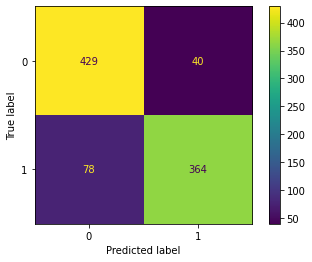

In [ ]:
matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['0', '1'])

cm_display.plot()
plt.show()

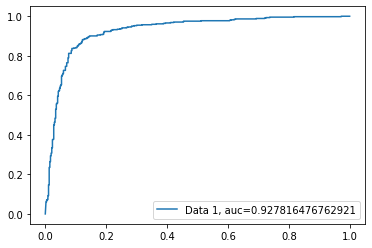

In [ ]:
y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "Data 1, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

In [ ]:
scores = []

### Decision Tree

In [ ]:
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)
 
predicted_value = model.predict(X_test)
acc = accuracy_score(predicted_value, y_test)
scores.append(acc)
tree_acc.append(acc)
print(f'Accuracy using Decision Tree: {acc}')

Accuracy using Decision Tree: 0.8353457738748628


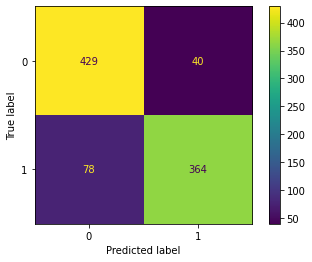

In [ ]:
tree_matrix = metrics.confusion_matrix(y_test, y_pred)
tree_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = tree_matrix, display_labels = ['0', '1'])

tree_cm_display.plot()
plt.show()

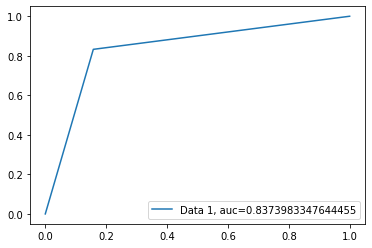

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "Data 1, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

### K-Fold Cross Validation

Accuracy Score: 0.8301369863013699
Confusion Matrix: 
[[162  14]
 [ 48 141]]


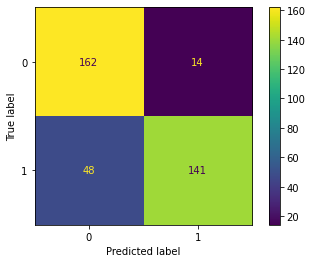



Accuracy Score: 0.8849315068493151
Confusion Matrix: 
[[164   9]
 [ 33 159]]


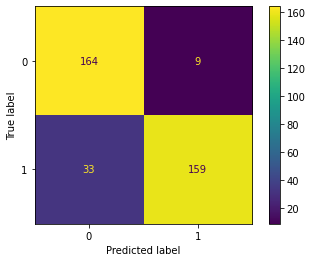



Accuracy Score: 0.8763736263736264
Confusion Matrix: 
[[173  11]
 [ 34 146]]


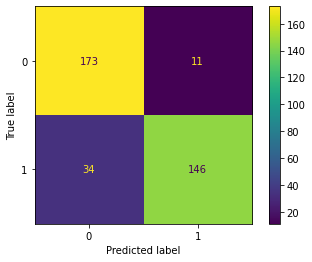



Accuracy Score: 0.8269230769230769
Confusion Matrix: 
[[171  13]
 [ 50 130]]


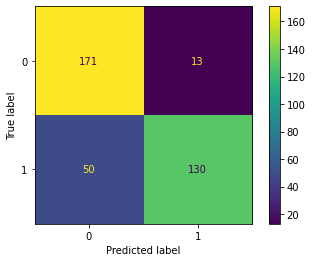



Accuracy Score: 0.8681318681318682
Confusion Matrix: 
[[159  22]
 [ 26 157]]


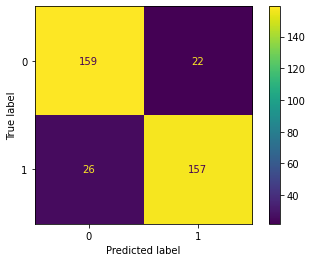



Accuracy Score: 0.8818681318681318
Confusion Matrix: 
[[190  13]
 [ 30 131]]


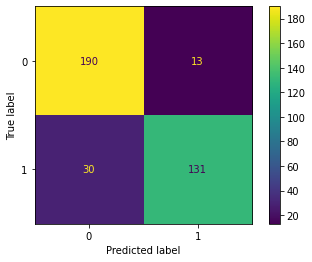



Accuracy Score: 0.8708791208791209
Confusion Matrix: 
[[162  14]
 [ 33 155]]


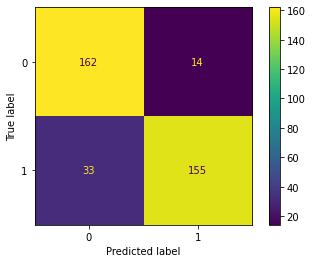



Accuracy Score: 0.9120879120879121
Confusion Matrix: 
[[182   9]
 [ 23 150]]


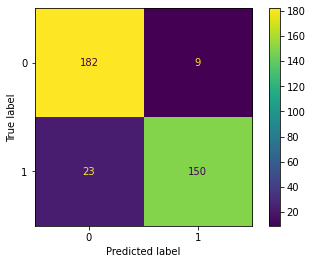



Accuracy Score: 0.8406593406593407
Confusion Matrix: 
[[158  14]
 [ 44 148]]


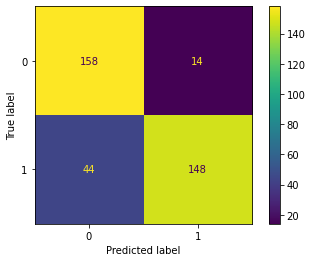



Accuracy Score: 0.8818681318681318
Confusion Matrix: 
[[169  12]
 [ 31 152]]


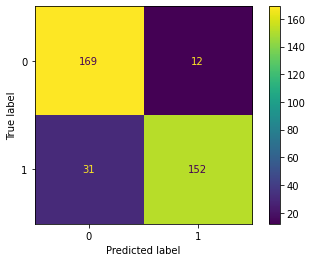



Average accuracy: 0.8673859701941893


In [ ]:
final_acc = 0
k_folds = KFold(n_splits = 10, shuffle = True, random_state = 2002)
for train_index, test_index in k_folds.split(X):
  X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
  y_train, y_test = y[train_index], y[test_index]
  rfc_model = GaussianNB()
  rfc_model.fit(X_train, y_train)
  test_preds = rfc_model.predict(X_test)
  test_accuracy = accuracy_score(y_test, test_preds)
  final_acc += test_accuracy
  test_confusion_matrix = metrics.confusion_matrix(y_test, test_preds)
  print(f'Accuracy Score: {test_accuracy}')
  print(f'Confusion Matrix: \n{test_confusion_matrix}')
  k_fold_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = test_confusion_matrix, display_labels = ['0', '1'])
  k_fold_cm_display.plot()
  plt.show()
  print('\n')

print(f'Average accuracy: {final_acc / 10}')

Accuracy Score: 0.8257887517146777
Confusion Matrix: 
[[292  56]
 [ 71 310]]


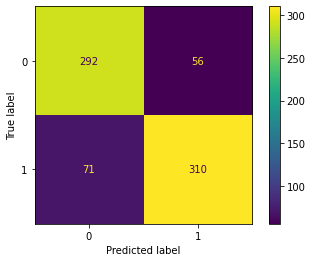



Accuracy Score: 0.8353909465020576
Confusion Matrix: 
[[310  59]
 [ 61 299]]


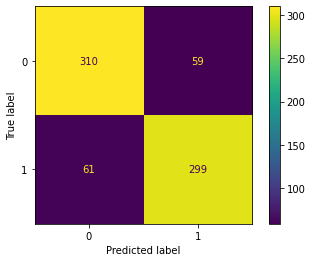



Accuracy Score: 0.8310439560439561
Confusion Matrix: 
[[313  71]
 [ 52 292]]


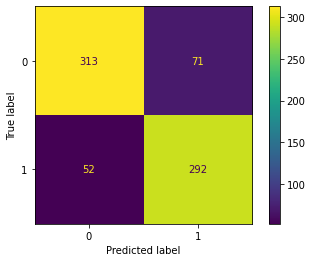



Accuracy Score: 0.8489010989010989
Confusion Matrix: 
[[314  53]
 [ 57 304]]


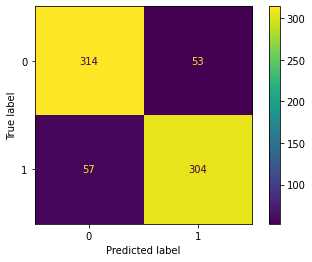



Accuracy Score: 0.8475274725274725
Confusion Matrix: 
[[299  54]
 [ 57 318]]


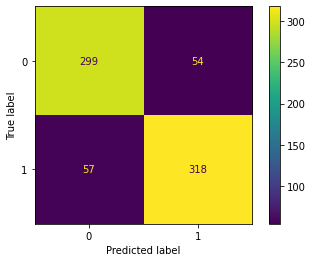



Average accuracy: 0.8377304451378527


In [ ]:
final = 0
k_folds = KFold(n_splits = 5, shuffle = True, random_state = 2002)
for train_index, test_index in k_folds.split(X):
  X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
  y_train, y_test = y[train_index], y[test_index]
  rfc_model = tree.DecisionTreeClassifier()
  rfc_model.fit(X_train, y_train)
  test_preds = rfc_model.predict(X_test)
  test_accuracy = accuracy_score(y_test, test_preds)
  final += test_accuracy
  test_confusion_matrix = metrics.confusion_matrix(y_test, test_preds)
  print(f'Accuracy Score: {test_accuracy}')
  print(f'Confusion Matrix: \n{test_confusion_matrix}')
  k_fold_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = test_confusion_matrix, display_labels = ['0', '1'])
  k_fold_cm_display.plot()
  plt.show()
  print('\n')

print(f'Average accuracy: {final / 5}')
scores.append(final/ 5)

### Bagging Classifier

In [ ]:
bagging = BaggingClassifier(base_estimator = gnb, n_estimators = 5, max_samples = 50, bootstrap = True)
bagging.fit(X_train, y_train)
print(f'Train score: {bagging.score(X_train, y_train)}')
print(f'Test score: {bagging.score(X_test, y_test)}')

Train score: 0.8825503355704698
Test score: 0.8873626373626373


In [ ]:
bagging = BaggingClassifier(base_estimator = model, n_estimators = 5, max_samples = 50, bootstrap = True)
bagging.fit(X_train, y_train)
print(f'Train score: {bagging.score(X_train, y_train)}')
print(f'Test score: {bagging.score(X_test, y_test)}')
scores.append(bagging.score(X_test, y_test))

Train score: 0.8853809196980096
Test score: 0.8763736263736264


### Boosting - Adaboost Classifier

In [ ]:
adaboost = AdaBoostClassifier(base_estimator = gnb, n_estimators = 5, learning_rate = 0.1, random_state = 25210)
adaboost.fit(X_train, y_train)
print(f"Train score: {adaboost.score(X_train, y_train)}")
print(f"Test score: {adaboost.score(X_test, y_test)}")

Train score: 0.8932275777913362
Test score: 0.8983516483516484


In [ ]:
adaboost = AdaBoostClassifier(base_estimator = model, n_estimators = 5, learning_rate = 0.1, random_state = 25210)
adaboost.fit(X_train, y_train)
print(f"Train score: {adaboost.score(X_train, y_train)}")
print(f"Test score: {adaboost.score(X_test, y_test)}")
scores.append(adaboost.score(X_test, y_test))

Train score: 1.0
Test score: 0.8475274725274725


### Random Forest Classifier

In [ ]:
clf = RandomForestClassifier(n_estimators = 100, max_features = "auto", random_state = 4627)
clf.fit(X_train, y_train)
print(f"Train score: {clf.score(X_train, y_train)}")
print(f"Test score: {clf.score(X_test, y_test)}")
scores.append(clf.score(X_test, y_test))

Train score: 1.0
Test score: 0.885989010989011


In [ ]:
all_data = {'Classifier': ['Decision Treee', 'K-Fold', 'Bagging Classifier', 'Adaboost', 'Random Forest'],
            'Accuracy': scores}
print(tabulate(all_data, tablefmt = 'grid'))

+--------------------+----------+
| Decision Treee     | 0.835346 |
+--------------------+----------+
| K-Fold             | 0.837454 |
+--------------------+----------+
| Bagging Classifier | 0.876374 |
+--------------------+----------+
| Adaboost           | 0.847527 |
+--------------------+----------+
| Random Forest      | 0.885989 |
+--------------------+----------+


# Heart Dataset

### Pre-processing

In [ ]:
dataset.append('Heart Attack')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv')

In [ ]:
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
df.size

4242

In [ ]:
df.shape

(303, 14)

In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info

<bound method DataFrame.info of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  ou

In [ ]:
for i in df.columns:
  print(i)

age
sex
cp
trtbps
chol
fbs
restecg
thalachh
exng
oldpeak
slp
caa
thall
output


In [ ]:
X = pd.DataFrame(df, columns = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall'])
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
y = df['output'].to_numpy()
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10242)

### Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
acc = accuracy_score(y_pred, y_test)
gnb_acc.append(acc)
print(f'Accuracy using Gaussian Naive Bayes: {acc}')

Accuracy using Gaussian Naive Bayes: 0.8360655737704918


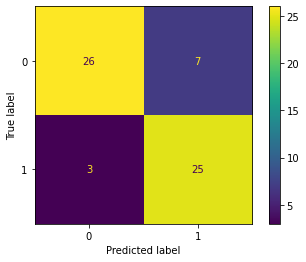

In [ ]:
matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['0', '1'])

cm_display.plot()
plt.show()

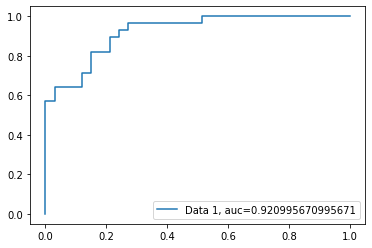

In [ ]:
y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "Data 1, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

### Decision Tree

In [ ]:
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)
 
predicted_value = model.predict(X_test)
acc = accuracy_score(predicted_value, y_test)
tree_acc.append(acc)
print(f'Accuracy using Decision Tree: {acc}')

Accuracy using Decision Tree: 0.9180327868852459


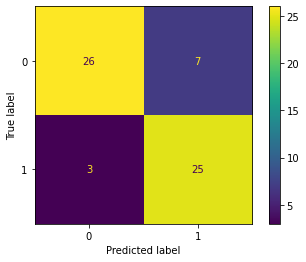

In [ ]:
tree_matrix = metrics.confusion_matrix(y_test, y_pred)
tree_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = tree_matrix, display_labels = ['0', '1'])

tree_cm_display.plot()
plt.show()

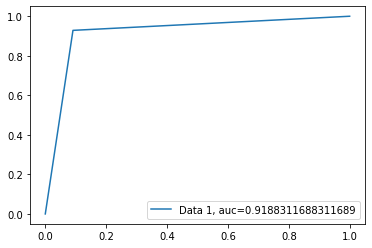

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "Data 1, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

### K-Fold Cross Validation

Accuracy Score: 0.7419354838709677
Confusion Matrix: 
[[14  4]
 [ 4  9]]


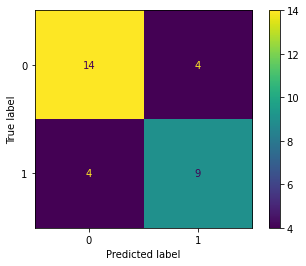



Accuracy Score: 0.7419354838709677
Confusion Matrix: 
[[12  4]
 [ 4 11]]


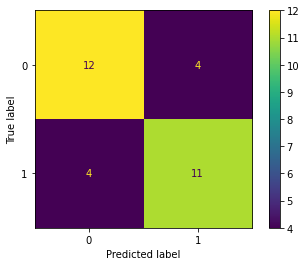



Accuracy Score: 0.7741935483870968
Confusion Matrix: 
[[ 8  3]
 [ 4 16]]


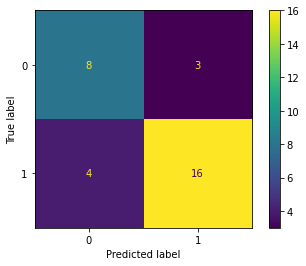



Accuracy Score: 0.8333333333333334
Confusion Matrix: 
[[ 9  3]
 [ 2 16]]


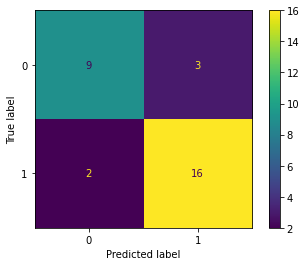



Accuracy Score: 0.8333333333333334
Confusion Matrix: 
[[ 8  1]
 [ 4 17]]


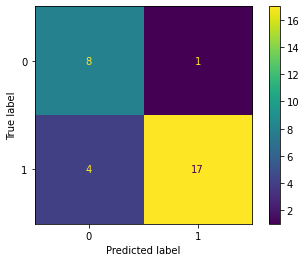



Accuracy Score: 1.0
Confusion Matrix: 
[[12  0]
 [ 0 18]]


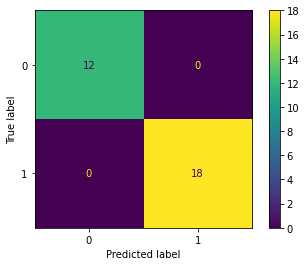



Accuracy Score: 0.7666666666666667
Confusion Matrix: 
[[10  5]
 [ 2 13]]


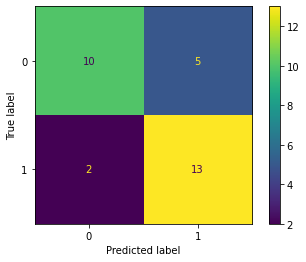



Accuracy Score: 0.8
Confusion Matrix: 
[[12  4]
 [ 2 12]]


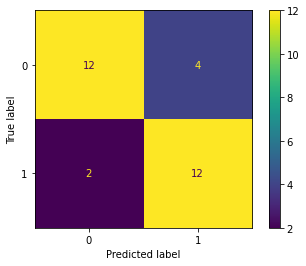



Accuracy Score: 0.9
Confusion Matrix: 
[[12  1]
 [ 2 15]]


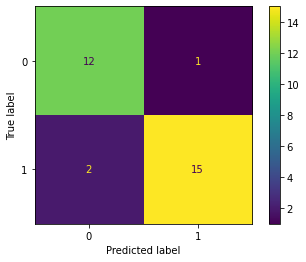



Accuracy Score: 0.8
Confusion Matrix: 
[[11  5]
 [ 1 13]]


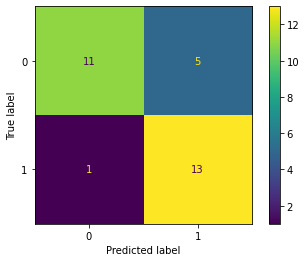



Average accuracy: 0.8191397849462365


In [ ]:
final_acc = 0
k_folds = KFold(n_splits = 10, shuffle = True, random_state = 2002)
for train_index, test_index in k_folds.split(X):
  X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
  y_train, y_test = y[train_index], y[test_index]
  rfc_model = GaussianNB()
  rfc_model.fit(X_train, y_train)
  test_preds = rfc_model.predict(X_test)
  test_accuracy = accuracy_score(y_test, test_preds)
  final_acc += test_accuracy
  test_confusion_matrix = metrics.confusion_matrix(y_test, test_preds)
  print(f'Accuracy Score: {test_accuracy}')
  print(f'Confusion Matrix: \n{test_confusion_matrix}')
  k_fold_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = test_confusion_matrix, display_labels = ['0', '1'])
  k_fold_cm_display.plot()
  plt.show()
  print('\n')

print(f'Average accuracy: {final_acc / 10}')

Accuracy Score: 0.7096774193548387
Confusion Matrix: 
[[12  6]
 [ 3 10]]


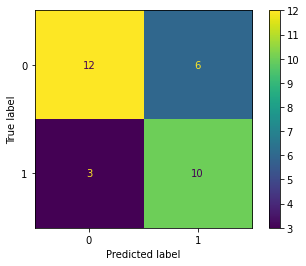



Accuracy Score: 0.6774193548387096
Confusion Matrix: 
[[11  5]
 [ 5 10]]


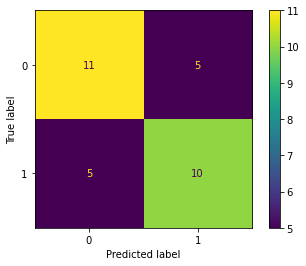



Accuracy Score: 0.7419354838709677
Confusion Matrix: 
[[ 5  6]
 [ 2 18]]


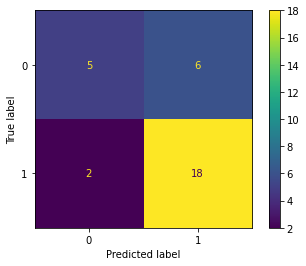



Accuracy Score: 0.8666666666666667
Confusion Matrix: 
[[11  1]
 [ 3 15]]


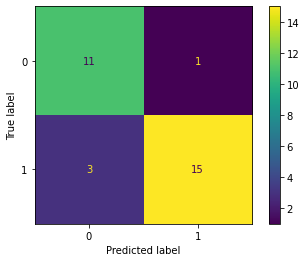



Accuracy Score: 0.6
Confusion Matrix: 
[[ 5  4]
 [ 8 13]]


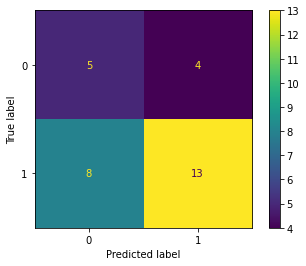



Accuracy Score: 0.8666666666666667
Confusion Matrix: 
[[12  0]
 [ 4 14]]


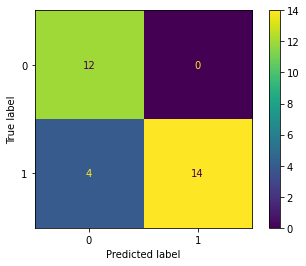



Accuracy Score: 0.6666666666666666
Confusion Matrix: 
[[ 8  7]
 [ 3 12]]


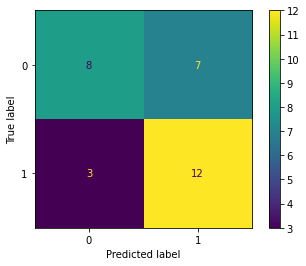



Accuracy Score: 0.8333333333333334
Confusion Matrix: 
[[13  3]
 [ 2 12]]


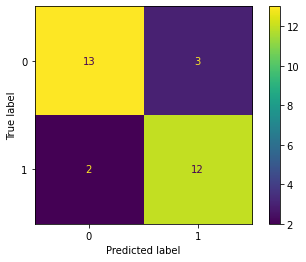



Accuracy Score: 0.7333333333333333
Confusion Matrix: 
[[ 9  4]
 [ 4 13]]


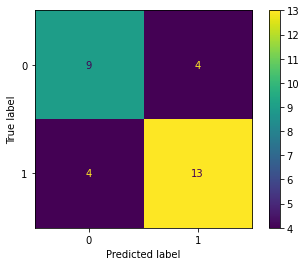



Accuracy Score: 0.8
Confusion Matrix: 
[[11  5]
 [ 1 13]]


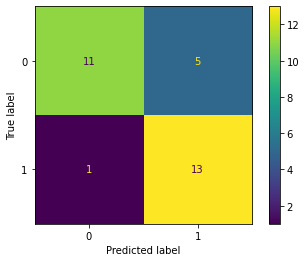



Average accuracy: 0.7495698924731183


In [ ]:
final = 0
k_folds = KFold(n_splits = 10, shuffle = True, random_state = 2002)
for train_index, test_index in k_folds.split(X):
  X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
  y_train, y_test = y[train_index], y[test_index]
  rfc_model = tree.DecisionTreeClassifier()
  rfc_model.fit(X_train, y_train)
  test_preds = rfc_model.predict(X_test)
  test_accuracy = accuracy_score(y_test, test_preds)
  final += test_accuracy
  test_confusion_matrix = metrics.confusion_matrix(y_test, test_preds)
  print(f'Accuracy Score: {test_accuracy}')
  print(f'Confusion Matrix: \n{test_confusion_matrix}')
  k_fold_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = test_confusion_matrix, display_labels = ['0', '1'])
  k_fold_cm_display.plot()
  plt.show()
  print('\n')

print(f'Average accuracy: {final / 10}')

### Bagging Classifier

In [ ]:
bagging = BaggingClassifier(base_estimator = gnb, n_estimators = 5, max_samples = 50, bootstrap = True)
bagging.fit(X_train, y_train)
print(f'Train score: {bagging.score(X_train, y_train)}')
print(f'Test score: {bagging.score(X_test, y_test)}')

Train score: 0.8278388278388278
Test score: 0.8


In [ ]:
bagging = BaggingClassifier(base_estimator = model, n_estimators = 5, max_samples = 50, bootstrap = True)
bagging.fit(X_train, y_train)
print(f'Train score: {bagging.score(X_train, y_train)}')
print(f'Test score: {bagging.score(X_test, y_test)}')

Train score: 0.8571428571428571
Test score: 0.7666666666666667


### Boosting - Adaboost Classifier

In [ ]:
adaboost = AdaBoostClassifier(base_estimator = gnb, n_estimators = 5, learning_rate = 0.1, random_state = 25210)
adaboost.fit(X_train, y_train)
print(f"Train score: {adaboost.score(X_train, y_train)}")
print(f"Test score: {adaboost.score(X_test, y_test)}")

Train score: 0.8571428571428571
Test score: 0.8


In [ ]:
adaboost = AdaBoostClassifier(base_estimator = model, n_estimators = 5, learning_rate = 0.1, random_state = 25210)
adaboost.fit(X_train, y_train)
print(f"Train score: {adaboost.score(X_train, y_train)}")
print(f"Test score: {adaboost.score(X_test, y_test)}")

Train score: 1.0
Test score: 0.8


### Random Forest Classifier

In [ ]:
clf = RandomForestClassifier(n_estimators = 100, max_features = "auto", random_state = 4627)
clf.fit(X_train, y_train)
print(f"Train score: {clf.score(X_train, y_train)}")
print(f"Test score: {clf.score(X_test, y_test)}")

Train score: 1.0
Test score: 0.8333333333333334


# Mushroom Dataset

### Pre-processing

In [ ]:
dataset.append('Mushroom')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/mushrooms.csv')

In [ ]:
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [ ]:
df.size

186852

In [ ]:
df.shape

(8124, 23)

In [ ]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
df.info

<bound method DataFrame.info of      class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-rin

In [ ]:
for i in df.columns:
  print(i)

class
cap-shape
cap-surface
cap-color
bruises
odor
gill-attachment
gill-spacing
gill-size
gill-color
stalk-shape
stalk-root
stalk-surface-above-ring
stalk-surface-below-ring
stalk-color-above-ring
stalk-color-below-ring
veil-type
veil-color
ring-number
ring-type
spore-print-color
population
habitat


In [ ]:
for i in df.columns:
  print(df[i].unique())

['p' 'e']
['x' 'b' 's' 'f' 'k' 'c']
['s' 'y' 'f' 'g']
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
['t' 'f']
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
['f' 'a']
['c' 'w']
['n' 'b']
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
['e' 't']
['e' 'c' 'b' 'r' '?']
['s' 'f' 'k' 'y']
['s' 'f' 'y' 'k']
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
['p']
['w' 'n' 'o' 'y']
['o' 't' 'n']
['p' 'e' 'l' 'f' 'n']
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
['s' 'n' 'a' 'v' 'y' 'c']
['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [ ]:
df.replace({'cap-shape': {'x': 0, 'b': 1, 's': 2, 'f': 3, 'k': 4, 'c': 5}, 
            'cap-surface': {'s': 0, 'y': 1, 'f': 2, 'g': 3}, 
            'cap-color': {'n': 0, 'y': 1, 'w': 2, 'g': 3, 'e': 4, 'p': 5, 'b': 6, 'u': 7, 'c': 8, 'r': 9},
            'bruises': {'t': 0, 'f': 1},
            'odor': {'p': 0, 'a': 1, 'l': 2, 'n': 3, 'f': 4, 'c': 5, 'y': 6, 's': 7, 'm': 8},
            'gill-attachment': {'f': 0, 'a': 1},
            'gill-spacing': {'c': 0, 'w': 1},
            'gill-size': {'n': 0, 'b': 1},
            'gill-color': {'k': 0, 'n': 1, 'g': 2, 'p': 3, 'w': 4, 'h': 5, 'u': 6, 'e': 7, 'b': 8, 'r': 9, 'y': 10, 'o': 11},
            'stalk-shape': {'e': 0, 't': 1},
            'stalk-root': {'e': 0, 'c': 1, 'b': 2, 'r': 3, '?': 4},
            'stalk-surface-above-ring': {'s': 0, 'f': 1, 'k': 2, 'y': 3},
            'stalk-surface-below-ring': {'s': 0, 'f': 1, 'k': 2, 'y': 3},
            'stalk-color-above-ring': {'w': 0, 'g': 1, 'p': 2, 'n': 3, 'b': 4, 'e': 5, 'o': 6, 'c': 7, 'y': 8},
            'stalk-color-below-ring': {'w': 0, 'g': 1, 'p': 2, 'n': 3, 'b': 4, 'e': 5, 'o': 6, 'c': 7, 'y': 8},
            'veil-type': {'p': 0},
            'veil-color': {'w': 0, 'n': 1, 'o': 2, 'y': 3},
            'ring-number': {'o': 0, 't': 1, 'n': 2},
            'ring-type': {'p': 0, 'e': 1, 'l': 2, 'f': 3, 'n': 4},
            'spore-print-color': {'k': 0, 'n': 1, 'u': 2, 'h': 3, 'w': 4, 'r': 5, 'o': 6, 'y': 7, 'b': 8},
            'population': {'s': 0, 'n': 1, 'a': 2, 'v': 3, 'y': 4, 'c': 5},
            'habitat': {'u': 0, 'g': 1, 'm': 2, 'd': 3, 'p': 4, 'w': 5, 'l': 6},
            'class': {'p': 0, 'e': 1}
            }, inplace = True)

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1


In [ ]:
X = pd.DataFrame(df, columns = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'])
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1
2,1,0,2,0,2,0,0,1,1,0,...,0,0,0,0,0,0,0,1,1,2
3,0,1,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,3,0,1,1,0,1,...,0,0,0,0,0,0,1,1,2,1


In [ ]:
y = df['class'].to_numpy()
y

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10242)

### Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
acc = accuracy_score(y_pred, y_test)
gnb_acc.append(acc)
print(f'Accuracy using Gaussian Naive Bayes: {acc}')

Accuracy using Gaussian Naive Bayes: 0.9269893355209188


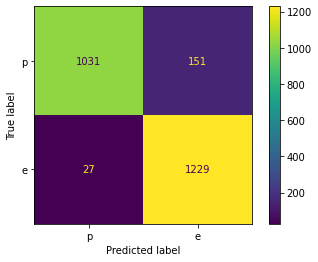

In [ ]:
matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['p', 'e'])

cm_display.plot()
plt.show()

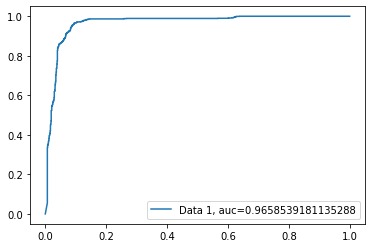

In [ ]:
y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "Data 1, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

### Decision Tree

In [ ]:
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)
 
predicted_value = model.predict(X_test)
acc = accuracy_score(predicted_value, y_test)
tree_acc.append(acc)
print(f'Accuracy using Decision Tree: {acc}')

Accuracy using Decision Tree: 0.9987694831829368


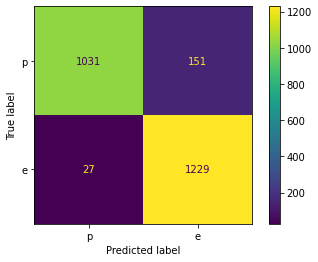

In [ ]:
tree_matrix = metrics.confusion_matrix(y_test, y_pred)
tree_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = tree_matrix, display_labels = ['p', 'e'])

tree_cm_display.plot()
plt.show()

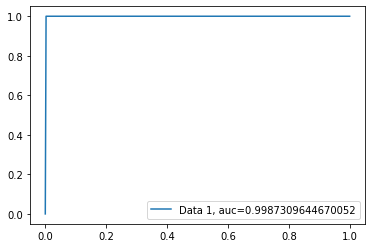

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "Data 1, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

### K-Fold Cross Validation

Accuracy Score: 0.933579335793358
Confusion Matrix: 
[[333  44]
 [ 10 426]]


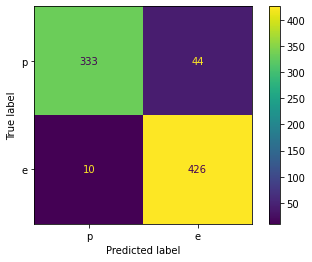



Accuracy Score: 0.9249692496924969
Confusion Matrix: 
[[356  53]
 [  8 396]]


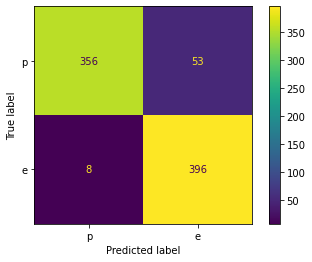



Accuracy Score: 0.923739237392374
Confusion Matrix: 
[[339  46]
 [ 16 412]]


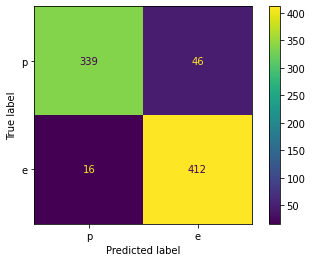



Accuracy Score: 0.9188191881918819
Confusion Matrix: 
[[347  48]
 [ 18 400]]


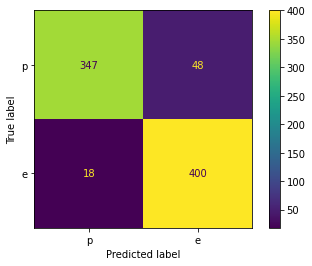



Accuracy Score: 0.916256157635468
Confusion Matrix: 
[[347  55]
 [ 13 397]]


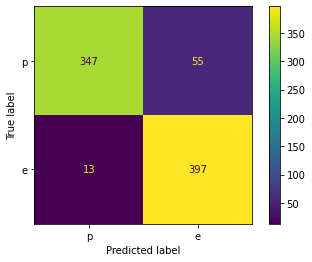



Accuracy Score: 0.9285714285714286
Confusion Matrix: 
[[338  43]
 [ 15 416]]


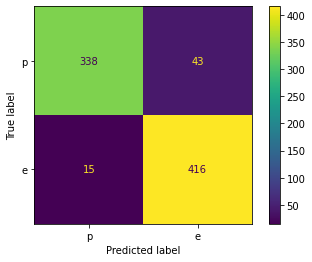



Accuracy Score: 0.9261083743842364
Confusion Matrix: 
[[329  48]
 [ 12 423]]


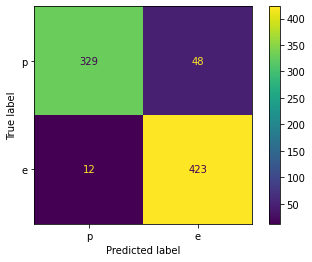



Accuracy Score: 0.9334975369458128
Confusion Matrix: 
[[341  44]
 [ 10 417]]


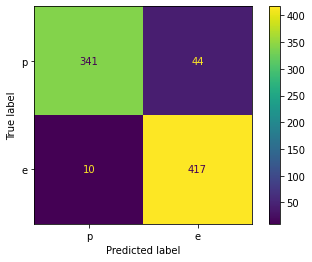



Accuracy Score: 0.9347290640394089
Confusion Matrix: 
[[344  42]
 [ 11 415]]


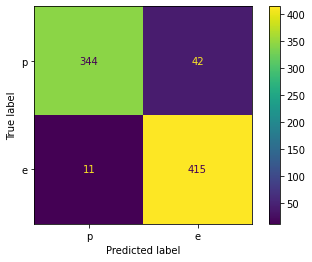



Accuracy Score: 0.9076354679802956
Confusion Matrix: 
[[359  60]
 [ 15 378]]


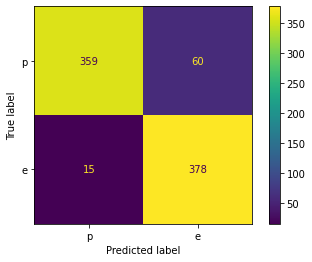



Average accuracy: 0.9247905040626762


In [ ]:
final_acc = 0
k_folds = KFold(n_splits = 10, shuffle = True, random_state = 2002)
for train_index, test_index in k_folds.split(X):
  X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
  y_train, y_test = y[train_index], y[test_index]
  rfc_model = GaussianNB()
  rfc_model.fit(X_train, y_train)
  test_preds = rfc_model.predict(X_test)
  test_accuracy = accuracy_score(y_test, test_preds)
  final_acc += test_accuracy
  test_confusion_matrix = metrics.confusion_matrix(y_test, test_preds)
  print(f'Accuracy Score: {test_accuracy}')
  print(f'Confusion Matrix: \n{test_confusion_matrix}')
  k_fold_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = test_confusion_matrix, display_labels = ['p', 'e'])
  k_fold_cm_display.plot()
  plt.show()
  print('\n')

print(f'Average accuracy: {final_acc / 10}')

Accuracy Score: 1.0
Confusion Matrix: 
[[377   0]
 [  0 436]]


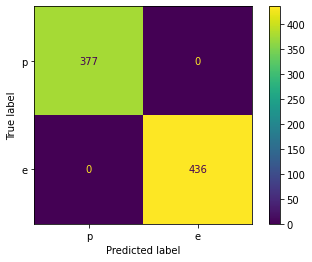



Accuracy Score: 1.0
Confusion Matrix: 
[[409   0]
 [  0 404]]


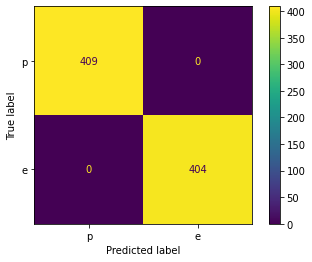



Accuracy Score: 1.0
Confusion Matrix: 
[[385   0]
 [  0 428]]


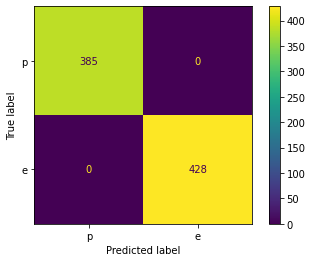



Accuracy Score: 1.0
Confusion Matrix: 
[[395   0]
 [  0 418]]


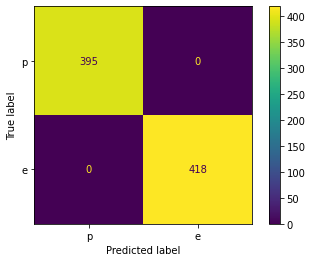



Accuracy Score: 1.0
Confusion Matrix: 
[[402   0]
 [  0 410]]


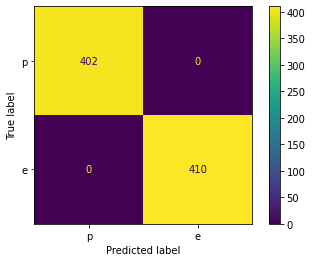



Accuracy Score: 1.0
Confusion Matrix: 
[[381   0]
 [  0 431]]


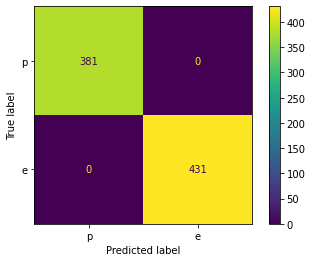



Accuracy Score: 1.0
Confusion Matrix: 
[[377   0]
 [  0 435]]


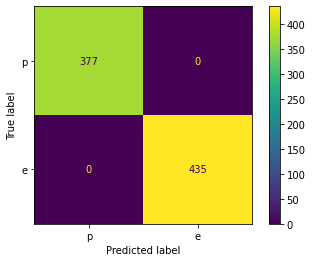



Accuracy Score: 1.0
Confusion Matrix: 
[[385   0]
 [  0 427]]


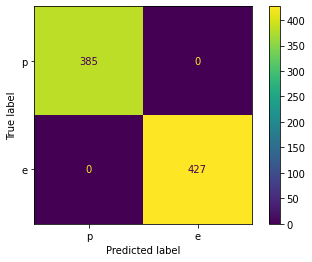



Accuracy Score: 1.0
Confusion Matrix: 
[[386   0]
 [  0 426]]


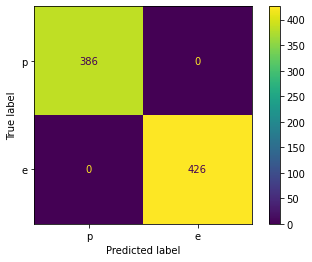



Accuracy Score: 1.0
Confusion Matrix: 
[[419   0]
 [  0 393]]


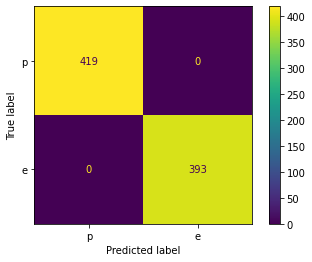



Average accuracy: 1.0


In [ ]:
final = 0
k_folds = KFold(n_splits = 10, shuffle = True, random_state = 2002)
for train_index, test_index in k_folds.split(X):
  X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
  y_train, y_test = y[train_index], y[test_index]
  rfc_model = tree.DecisionTreeClassifier()
  rfc_model.fit(X_train, y_train)
  test_preds = rfc_model.predict(X_test)
  test_accuracy = accuracy_score(y_test, test_preds)
  final += test_accuracy
  test_confusion_matrix = metrics.confusion_matrix(y_test, test_preds)
  print(f'Accuracy Score: {test_accuracy}')
  print(f'Confusion Matrix: \n{test_confusion_matrix}')
  k_fold_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = test_confusion_matrix, display_labels = ['p', 'e'])
  k_fold_cm_display.plot()
  plt.show()
  print('\n')

print(f'Average accuracy: {final / 10}')

### Bagging Classifier

In [ ]:
bagging = BaggingClassifier(base_estimator = gnb, n_estimators = 5, max_samples = 50, bootstrap = True)
bagging.fit(X_train, y_train)
print(f'Train score: {bagging.score(X_train, y_train)}')
print(f'Test score: {bagging.score(X_test, y_test)}')

Train score: 0.662472647702407
Test score: 0.6896551724137931


In [ ]:
bagging = BaggingClassifier(base_estimator = model, n_estimators = 5, max_samples = 50, bootstrap = True)
bagging.fit(X_train, y_train)
print(f'Train score: {bagging.score(X_train, y_train)}')
print(f'Test score: {bagging.score(X_test, y_test)}')

Train score: 0.9723741794310722
Test score: 0.9827586206896551


### Boosting - Adaboost Classifier

In [ ]:
adaboost = AdaBoostClassifier(base_estimator = gnb, n_estimators = 5, learning_rate = 0.1, random_state = 25210)
adaboost.fit(X_train, y_train)
print(f"Train score: {adaboost.score(X_train, y_train)}")
print(f"Test score: {adaboost.score(X_test, y_test)}")

Train score: 0.9715536105032823
Test score: 0.9692118226600985


In [ ]:
adaboost = AdaBoostClassifier(base_estimator = model, n_estimators = 5, learning_rate = 0.1, random_state = 25210)
adaboost.fit(X_train, y_train)
print(f"Train score: {adaboost.score(X_train, y_train)}")
print(f"Test score: {adaboost.score(X_test, y_test)}")

Train score: 1.0
Test score: 1.0


### Random Forest Classifier

In [ ]:
clf = RandomForestClassifier(n_estimators = 100, max_features = "auto", random_state = 4627)
clf.fit(X_train, y_train)
print(f"Train score: {clf.score(X_train, y_train)}")
print(f"Test score: {clf.score(X_test, y_test)}")

Train score: 1.0
Test score: 1.0


# Customer Dataset

### Pre-processing

In [ ]:
dataset.append('Customer')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Customer_Behaviour.csv')

In [ ]:
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [ ]:
df.size

2000

In [ ]:
df.shape

(400, 5)

In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df.info

<bound method DataFrame.info of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [ ]:
for i in df.columns:
  print(i)

User ID
Gender
Age
EstimatedSalary
Purchased


In [ ]:
df.drop('User ID', axis = 1)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [ ]:
df.replace(to_replace = 'Male', value = 0, inplace = True)
df.replace(to_replace =  'Female', value = 1, inplace = True)

In [ ]:
X = pd.DataFrame(df, columns = ['Gender', 'Age', 'EstimatedSalary'])
X.head()

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000


In [ ]:
y = df['Purchased'].to_numpy()
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10242)

### Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
acc = accuracy_score(y_pred, y_test)
gnb_acc.append(acc)
print(f'Accuracy using Gaussian Naive Bayes: {acc}')

Accuracy using Gaussian Naive Bayes: 0.925


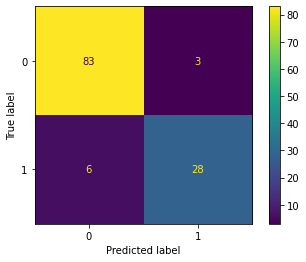

In [ ]:
matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['0', '1'])

cm_display.plot()
plt.show()

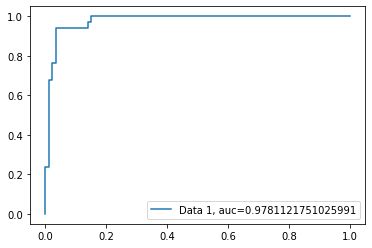

In [ ]:
y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "Data 1, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

### Decision Tree

In [ ]:
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)
 
predicted_value = model.predict(X_test)
acc = accuracy_score(predicted_value, y_test)
tree_acc.append(acc)
print(f'Accuracy using Decision Tree: {acc}')

Accuracy using Decision Tree: 0.9416666666666667


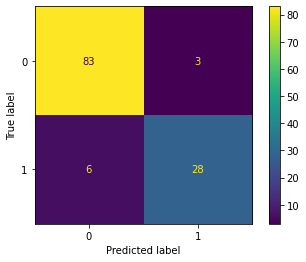

In [ ]:
tree_matrix = metrics.confusion_matrix(y_test, y_pred)
tree_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = tree_matrix, display_labels = ['0', '1'])

tree_cm_display.plot()
plt.show()

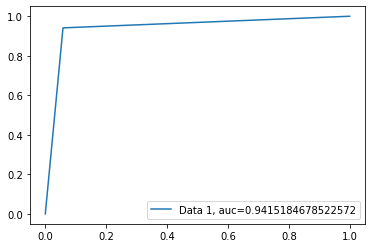

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "Data 1, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

### K-Fold Cross Validation

Accuracy Score: 0.925
Confusion Matrix: 
[[27  2]
 [ 1 10]]


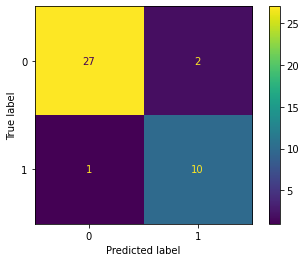



Accuracy Score: 0.825
Confusion Matrix: 
[[22  2]
 [ 5 11]]


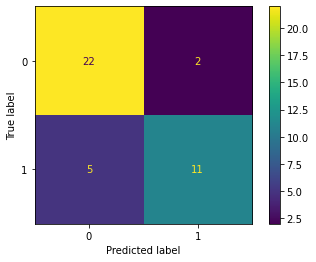



Accuracy Score: 0.925
Confusion Matrix: 
[[24  0]
 [ 3 13]]


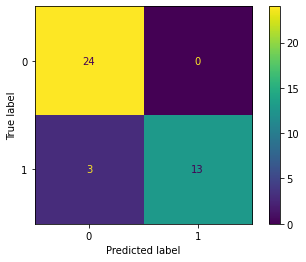



Accuracy Score: 0.875
Confusion Matrix: 
[[20  1]
 [ 4 15]]


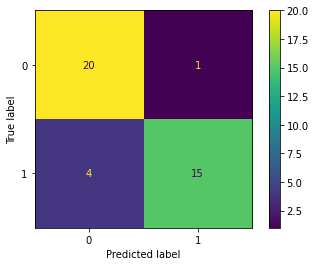



Accuracy Score: 0.875
Confusion Matrix: 
[[29  0]
 [ 5  6]]


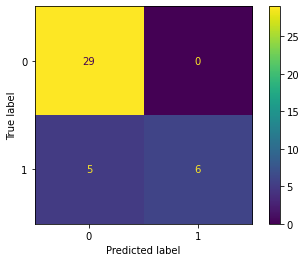



Accuracy Score: 0.875
Confusion Matrix: 
[[21  4]
 [ 1 14]]


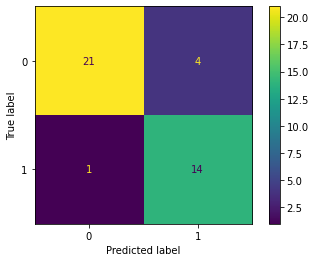



Accuracy Score: 0.875
Confusion Matrix: 
[[22  2]
 [ 3 13]]


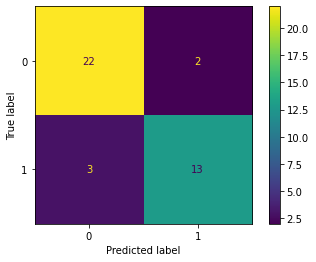



Accuracy Score: 0.925
Confusion Matrix: 
[[27  3]
 [ 0 10]]


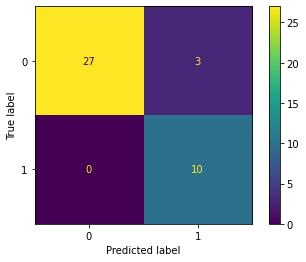



Accuracy Score: 0.9
Confusion Matrix: 
[[26  1]
 [ 3 10]]


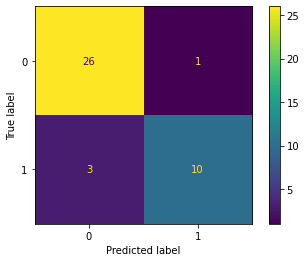



Accuracy Score: 0.875
Confusion Matrix: 
[[21  3]
 [ 2 14]]


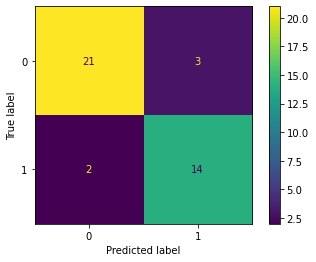



Average accuracy: 0.8875


In [ ]:
final_acc = 0
k_folds = KFold(n_splits = 10, shuffle = True, random_state = 2002)
for train_index, test_index in k_folds.split(X):
  X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
  y_train, y_test = y[train_index], y[test_index]
  rfc_model = GaussianNB()
  rfc_model.fit(X_train, y_train)
  test_preds = rfc_model.predict(X_test)
  test_accuracy = accuracy_score(y_test, test_preds)
  final_acc += test_accuracy
  test_confusion_matrix = metrics.confusion_matrix(y_test, test_preds)
  print(f'Accuracy Score: {test_accuracy}')
  print(f'Confusion Matrix: \n{test_confusion_matrix}')
  k_fold_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = test_confusion_matrix, display_labels = ['0', '1'])
  k_fold_cm_display.plot()
  plt.show()
  print('\n')

print(f'Average accuracy: {final_acc / 10}')

Accuracy Score: 0.85
Confusion Matrix: 
[[25  4]
 [ 2  9]]


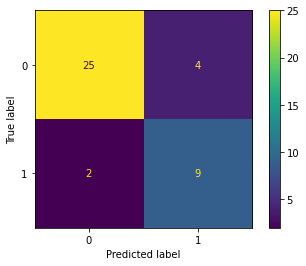



Accuracy Score: 0.875
Confusion Matrix: 
[[24  0]
 [ 5 11]]


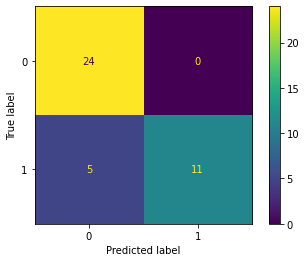



Accuracy Score: 0.8
Confusion Matrix: 
[[23  1]
 [ 7  9]]


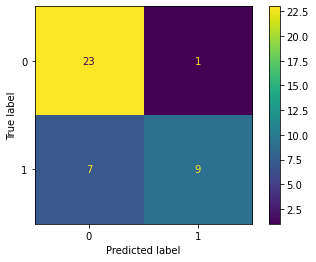



Accuracy Score: 0.875
Confusion Matrix: 
[[18  3]
 [ 2 17]]


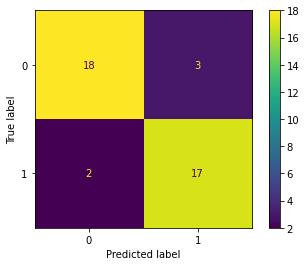



Accuracy Score: 0.85
Confusion Matrix: 
[[26  3]
 [ 3  8]]


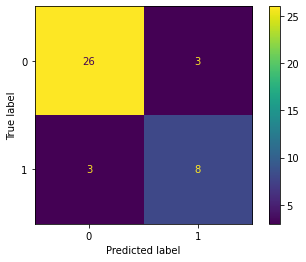



Accuracy Score: 0.85
Confusion Matrix: 
[[20  5]
 [ 1 14]]


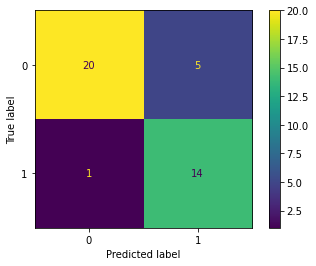



Accuracy Score: 0.8
Confusion Matrix: 
[[18  6]
 [ 2 14]]


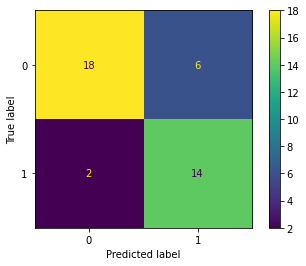



Accuracy Score: 0.95
Confusion Matrix: 
[[28  2]
 [ 0 10]]


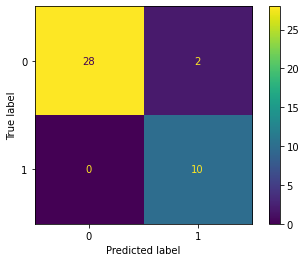



Accuracy Score: 0.9
Confusion Matrix: 
[[25  2]
 [ 2 11]]


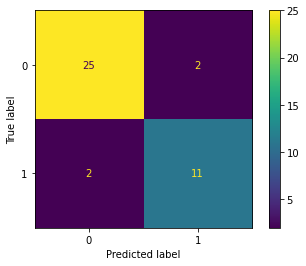



Accuracy Score: 0.85
Confusion Matrix: 
[[21  3]
 [ 3 13]]


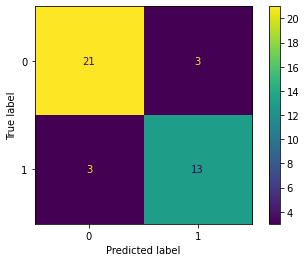



Average accuracy: 0.86


In [ ]:
final = 0
k_folds = KFold(n_splits = 10, shuffle = True, random_state = 2002)
for train_index, test_index in k_folds.split(X):
  X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
  y_train, y_test = y[train_index], y[test_index]
  rfc_model = tree.DecisionTreeClassifier()
  rfc_model.fit(X_train, y_train)
  test_preds = rfc_model.predict(X_test)
  test_accuracy = accuracy_score(y_test, test_preds)
  final += test_accuracy
  test_confusion_matrix = metrics.confusion_matrix(y_test, test_preds)
  print(f'Accuracy Score: {test_accuracy}')
  print(f'Confusion Matrix: \n{test_confusion_matrix}')
  k_fold_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = test_confusion_matrix, display_labels = ['0', '1'])
  k_fold_cm_display.plot()
  plt.show()
  print('\n')

print(f'Average accuracy: {final / 10}')

### Bagging Classifier

In [ ]:
bagging = BaggingClassifier(base_estimator = gnb, n_estimators = 5, max_samples = 50, bootstrap=True)
bagging.fit(X_train, y_train)
print(f'Train score: {bagging.score(X_train, y_train)}')
print(f'Test score: {bagging.score(X_test, y_test)}')

Train score: 0.9027777777777778
Test score: 0.85


In [ ]:
bagging = BaggingClassifier(base_estimator = model, n_estimators = 5, max_samples = 50, bootstrap=True)
bagging.fit(X_train, y_train)
print(f'Train score: {bagging.score(X_train, y_train)}')
print(f'Test score: {bagging.score(X_test, y_test)}')

Train score: 0.9111111111111111
Test score: 0.85


### Boosting - Adaboost Classifier

In [ ]:
adaboost = AdaBoostClassifier(base_estimator = gnb, n_estimators = 5, learning_rate = 0.1, random_state = 25210)
adaboost.fit(X_train, y_train)
print(f"Train score: {adaboost.score(X_train, y_train)}")
print(f"Test score: {adaboost.score(X_test, y_test)}")

Train score: 0.8916666666666667
Test score: 0.85


In [ ]:
adaboost = AdaBoostClassifier(base_estimator = model, n_estimators = 5, learning_rate = 0.1, random_state = 25210)
adaboost.fit(X_train, y_train)
print(f"Train score: {adaboost.score(X_train, y_train)}")
print(f"Test score: {adaboost.score(X_test, y_test)}")

Train score: 1.0
Test score: 0.825


## Comparison of Dataset Accuracies

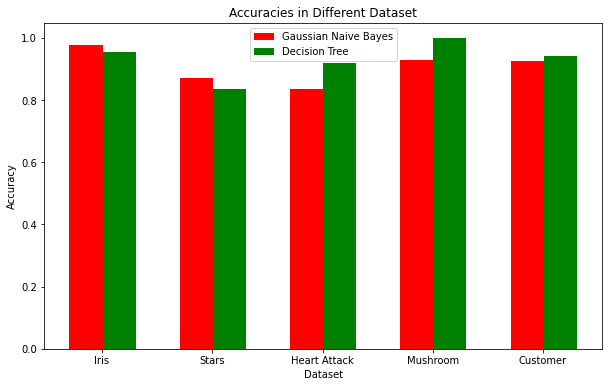

In [ ]:
N = 3
ind = np.arange(len(dataset[::1]))
width = 0.3

fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, gnb_acc, width, color = 'r')
rects2 = ax.bar(ind+width, tree_acc, width, color = 'g')

ax.set_ylabel('Accuracy')
ax.set_xlabel('Dataset')
ax.set_xticks(ind + width - 0.155)
ax.set_xticklabels(dataset)
ax.legend((rects1[0], rects2[0]), ('Gaussian Naive Bayes', 'Decision Tree') )

ax.set_title('Accuracies in Different Dataset')
fig.set_figwidth(10)
fig.set_figheight(6)

plt.show()